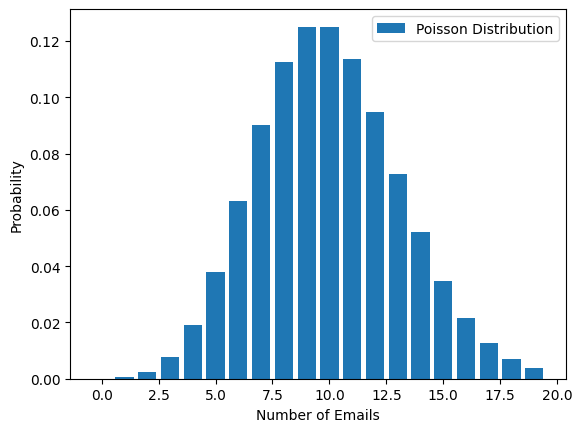

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

lambda_val = 10  # Mean of the Poisson distribution

x = np.arange(0, 20)
poisson_pmf = poisson.pmf(x, lambda_val)

plt.bar(x, poisson_pmf, label='Poisson Distribution')
plt.xlabel('Number of Emails')
plt.ylabel('Probability')
plt.legend()
plt.show()


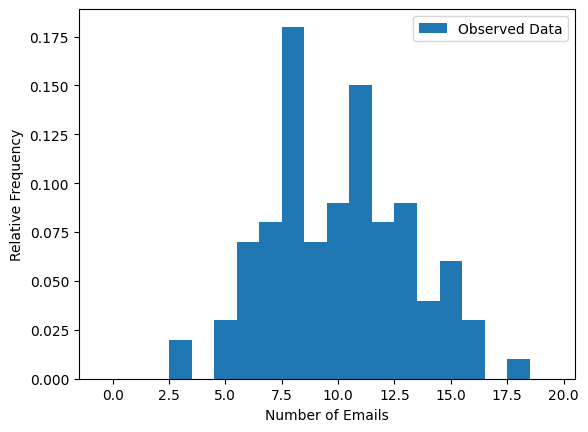

In [5]:
np.random.seed(42)
observed_data = np.random.poisson(10, size=100)  # Simulating observed data with mean 10

plt.hist(observed_data, bins=np.arange(0, 21) - 0.5, density=True, label='Observed Data')
plt.xlabel('Number of Emails')
plt.ylabel('Relative Frequency')
plt.legend()
plt.show()


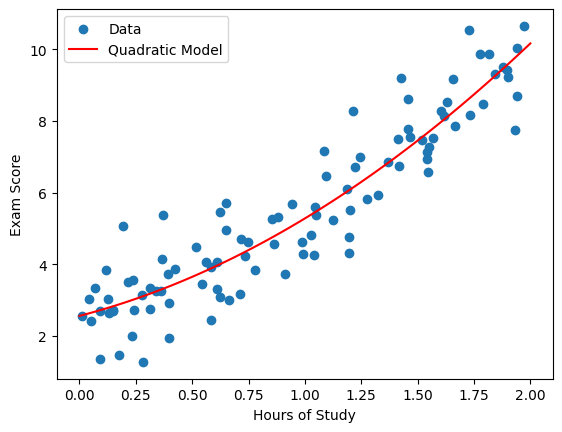

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate example data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 random study hours
Y = 2 + 3 * X + 0.5 * X**2 + np.random.randn(100, 1)  # Quadratic relationship with noise

# Fit quadratic model
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)

# Plot the data and the fitted quadratic curve
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
Y_new = lin_reg.predict(X_new_poly)

plt.scatter(X, Y, label='Data')
plt.plot(X_new, Y_new, 'r-', label='Quadratic Model')
plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.legend()
plt.show()


Iteration: 0, Statistic: 0.9551658630371094, p-value: 0.0018457869300618768
Iteration: 1, Statistic: 0.9832853674888611, p-value: 1.2608724157008303e-32
Iteration: 2, Statistic: 0.9835642576217651, p-value: 0.0


c:\Users\esual\OneDrive\Documents\StaDS\lmu_repo\.venv\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Iteration: 3, Statistic: 0.9356038570404053, p-value: 0.0


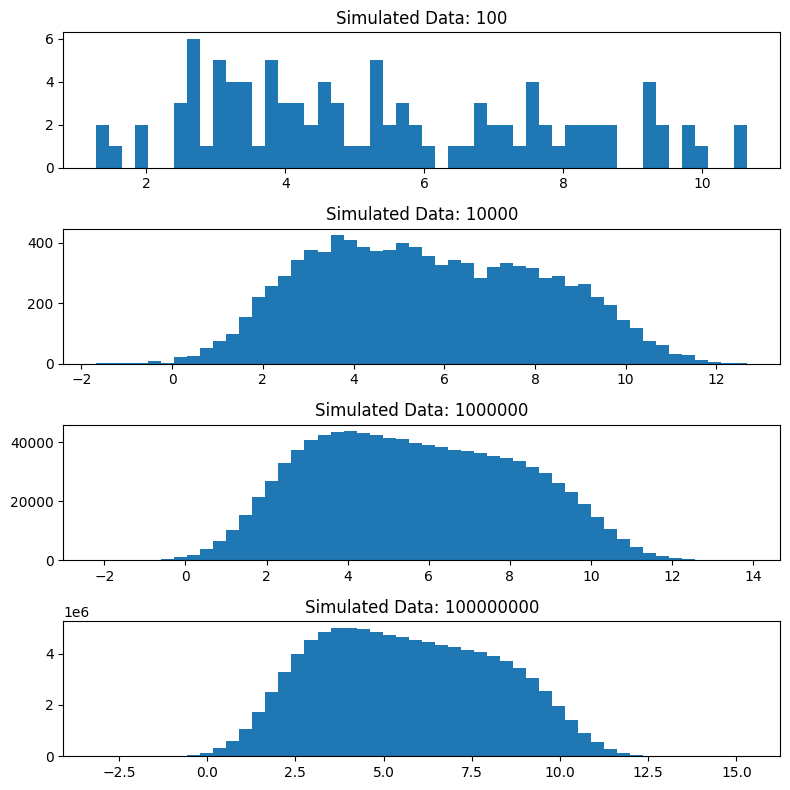

In [17]:
# Generate example data
from scipy.stats import shapiro


fig, axs = plt.subplots(4,1, figsize=(8,8))
np.random.seed(42)

for i in range(4):
    X = 2 * np.random.rand(100**(i+1), 1)  # 100 random study hours
    Y = 2 + 3 * X + 0.5 * X**2 + np.random.randn(100**(i+1), 1)
    axs[i].hist(Y, bins=50)
    axs[i].set_title(f'Simulated Data: {100**(i+1)}')
    # Assume 'data' is your dataset
    stat, p_value = shapiro(Y)

    print(f'Iteration: {i}, Statistic: {stat}, p-value: {p_value}')

plt.tight_layout()
plt.show()

In [43]:
import numpy as np
from scipy.stats import poisson
from statsmodels.genmod import families
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Simulate data with overdispersion
true_lambda = 3.0
overdispersion_factor = 3
n_obs = 100
X = np.random.normal(0, 1, size=(n_obs, 1))
linear_predictor = 1 + 2 * X
y = np.random.poisson(true_lambda * np.exp(linear_predictor) * overdispersion_factor) + np.random.randint(true_lambda, 100, size=(100,1))

# Fit Poisson GLM using identity link
poisson_model = sm.GLM(y, sm.add_constant(X), family=families.Poisson())
poisson_results = poisson_model.fit()

# Calculate likelihood using scipy.stats.poisson.logpmf
likelihood = np.sum(poisson.logpmf(y, true_lambda * np.exp(linear_predictor)))

# Calculate quasi-likelihood using statsmodels.genmod.families.Poisson().loglike
quasi_likelihood = families.Poisson().loglike(poisson_results.params, y, linear_predictor)

print(f"Likelihood: {likelihood}")
print(f"Quasi-Likelihood: {np.sum(quasi_likelihood)}")
print(f"Model Parameters: {poisson_results.params}")


Likelihood: -15744.895274531113
Quasi-Likelihood: -56800.876904441815
Model Parameters: [4.60231311 0.99384903]


In [44]:
print(poisson_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1622.7
Date:                Wed, 24 Jan 2024   Deviance:                       2615.9
Time:                        12:27:45   Pearson chi2:                 3.47e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6023      0.011    414.379      0.0

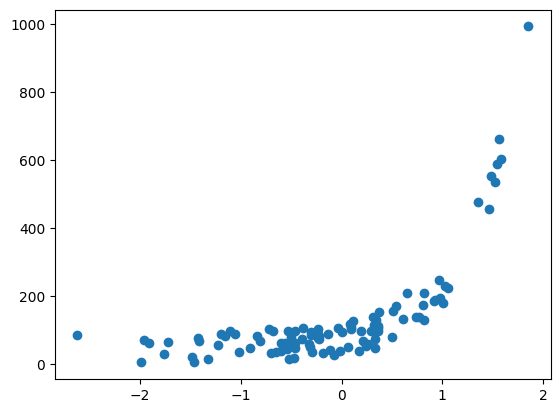

In [45]:
plt.scatter(x=X, y=y)

(array([70.,  9.,  7.,  3.,  3.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,  47.75,  95.5 , 143.25, 191.  , 238.75, 286.5 , 334.25,
        382.  , 429.75, 477.5 , 525.25, 573.  , 620.75, 668.5 , 716.25,
        764.  , 811.75, 859.5 , 907.25, 955.  ]),
 <BarContainer object of 20 artists>)

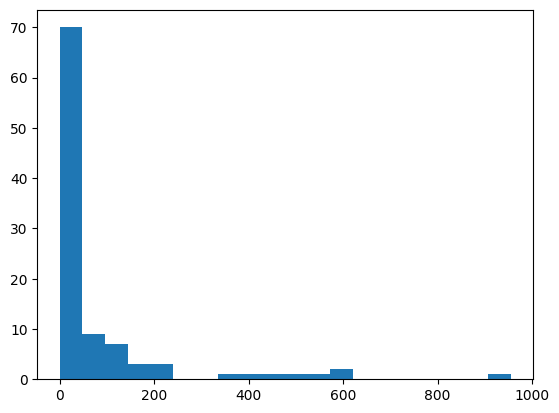

In [29]:
plt.hist(y, bins=20)

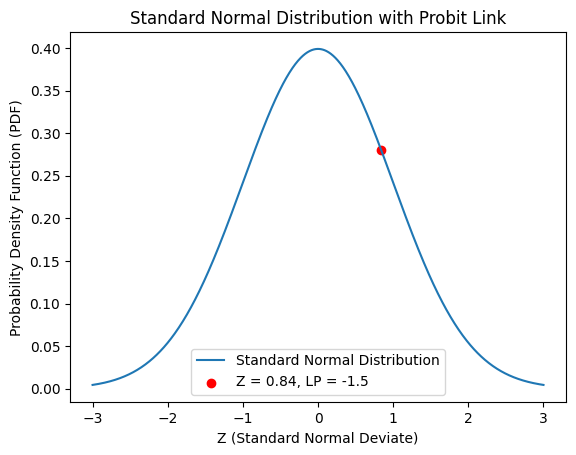

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set the linear predictor value
linear_predictor = -1.5

# Set the probability of success
pi_i = 0.8

# Find the corresponding Z value using the probit link
Z = norm.ppf(pi_i)

# Create an array of values for the x-axis
x = np.linspace(-3, 3, 1000)

# Plot the standard normal distribution
plt.plot(x, norm.pdf(x), label='Standard Normal Distribution')

# Highlight the Z value on the curve
plt.scatter(Z, norm.pdf(Z), color='red', label=f'Z = {Z:.2f}, LP = {linear_predictor}')

# Add labels and legend
plt.xlabel('Z (Standard Normal Deviate)')
plt.ylabel('Probability Density Function (PDF)')
plt.title('Standard Normal Distribution with Probit Link')
plt.legend()

# Show the plot
plt.show()


In [51]:
Z

-1.2815515655446004